# Problem Statement

In this assignment students have to compress racoon grey scale image into 5 clusters. In
the end, visualize both raw and compressed image and look for quality difference.
The raw image is available in spicy.misc package with the name face.

Hint:

import numpy as np
from sklearn import cluster, datasets
from scipy import misc

In [1]:
#import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster
from scipy.misc import face
from skimage.measure import compare_ssim as ssim

In [2]:
#load face from scipy.misc
face = face(gray=True)

# Use KMeans clustering on a image represented vectors

In [3]:
#Apply k-means clustering
n_clusters = 5
np.random.seed(0)

X = face.reshape((-1,1)) #We need an (n_sample, n_feature) array for kmeans clustering
k_means = cluster.KMeans(n_clusters=n_clusters,n_init=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
print(values)
print(labels)

[111.62805703  27.11166441 192.8878986   73.35388722 150.24313581]
[0 0 4 ... 4 4 4]


In [5]:
#create an array from labels and values
face_compressed = np.choose(labels,values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

print(vmin)
print(vmax)

0
250


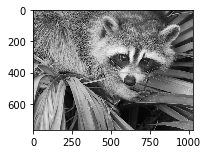

In [6]:
# orignal face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)